In [2]:
import numpy as np
import pandas as pd
np.random.seed(42)
import sklearn
import os
import keras
import pickle
from skimage import data, img_as_float, exposure, io
from tqdm import tqdm
from scipy import misc

import matplotlib.pyplot as plt
import seaborn as sns
#import collections
import csv
from keras.utils import np_utils
import random
from sklearn.utils import shuffle
from skimage import transform as transf
from sklearn.model_selection import train_test_split
import cv2
import plotter
import loader
import preprocess
%matplotlib inline
from IPython.display import HTML


#TODO : REFACTOR
import numpy as np
np.random.seed(42)
import sklearn
import os
from imp import reload
#import helper
import keras
import pickle
import math
import collections
from sklearn.metrics import confusion_matrix
from keras import backend as K

from keras.callbacks import CSVLogger, LearningRateScheduler,Callback,ModelCheckpoint,EarlyStopping,TensorBoard,ReduceLROnPlateau

import matplotlib.pyplot as plt
import seaborn as sns
import collections
import csv
from keras.utils import np_utils
import random
from sklearn.utils import shuffle
from skimage import transform as transf
from sklearn.model_selection import train_test_split
import cv2
import plotter
import loader
import preprocess
%matplotlib inline


from keras.layers.advanced_activations import LeakyReLU 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import statistics
import pandas as pd

from tqdm import tqdm

from keras.regularizers import l2

import random
import csv
from tensorflow.contrib.layers import flatten
from skimage import transform as transf

import loader
import preprocess
import plotter
import Models
import class_helper

#from prettytable import PrettyTable
%matplotlib inline

SEED = 22

#SEED = 22

Using TensorFlow backend.


# Load and Explore Data

In [3]:
#load data

X_train, y_train, X_valid, y_valid, X_test, y_test = loader.load_data()
print("data loaded")


data loaded


## Basic Stats on data
* Number of training examples = 39209
* Number of validation examples = 4410
* Number of testing examples = 12630
* Image data shape = (32, 32, 3)
* Number of classes = 43

In [18]:
#Print basic stats, number of Train, Test, Valid samples

import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples.
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# The shape of a traffic sign image
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [19]:
class_stats = loader.get_class_stats(y_train,y_test,y_valid)

In [6]:
#utility class functions
def plot_first_images(first_images):
    
    nr = 10 ; nc = 10
    plt.figure(figsize=(nr,nc))
    for image,i in zip(first_images, range(len(first_images))):
        label = (str(i) + "\n"                                            # class
              + '('+str(class_stats['NumTrain'][i])+')')                              # no. of training samples
              
        plotter.plot_image(image.squeeze(), nr, nc, i+1, label)
    



## Training images, one from each class


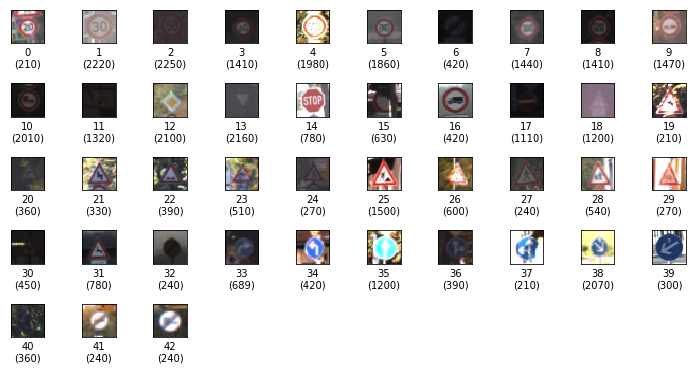

In [8]:
first_imgs = class_helper.get_first_images(X_train,y_train)
plot_first_images(first_imgs)

## Sign Names, counts and percentages of samples per class for Test, Train, Validate datasets

In [20]:
#sign_names=sign_names.round(2)

cm = sns.light_palette("purple", as_cmap=True)
#s = sign_names.style.format({'PerTrain': '{}%', 'PerTrain':'{}%'})
#highlight_max = Styler.highlight_max(subset=None, color='yellow', axis=0)
#format_percent = 
#s = sign_names.style.background_gradient(cmap=cm)

s = class_stats.round(2).copy()
s.columns = ['ClassID','Sign','#Train', '#Test', '#Valid', '%Train','%Test','%Valid']
html = (
    s.style
    .format("{}%", subset=['%Train','%Test','%Valid'])
    #.highlight_max(subset=['NumTrain'])
    .background_gradient(cmap=cm,subset=['#Train','#Test','#Valid','%Train','%Test','%Valid'])
    .render()
)

display(HTML(html))

,ClassID,Sign,#Train,#Test,#Valid,%Train,%Test,%Valid
0,0,Speed limit (20km/h),210,60,30,0.54%,0.48%,0.68%
1,1,Speed limit (30km/h),2220,720,240,5.66%,5.7%,5.44%
2,2,Speed limit (50km/h),2250,750,240,5.74%,5.94%,5.44%
3,3,Speed limit (60km/h),1410,450,150,3.6%,3.56%,3.4%
4,4,Speed limit (70km/h),1980,660,210,5.05%,5.23%,4.76%
5,5,Speed limit (80km/h),1860,630,210,4.74%,4.99%,4.76%
6,6,End of speed limit (80km/h),420,150,60,1.07%,1.19%,1.36%
7,7,Speed limit (100km/h),1440,450,150,3.67%,3.56%,3.4%
8,8,Speed limit (120km/h),1410,450,150,3.6%,3.56%,3.4%
9,9,No passing,1470,480,150,3.75%,3.8%,3.4%


## Visualization 

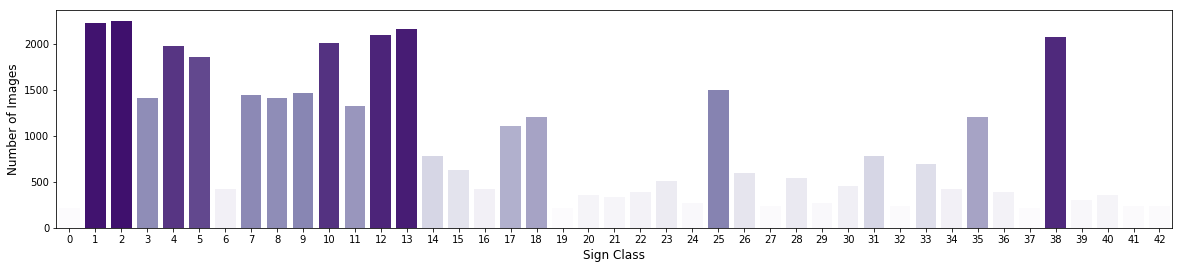

In [22]:
#print(class_stats.head())
plt.figure(figsize=(20,4))
#sns.color_palette("Blues")
#palette=sns.color_palette("Set2", 10)
#palette = sns.color_palette("coolwarm", 7)
norm = plt.Normalize(class_stats['NumTrain'].values.min(), class_stats['NumTrain'].values.max())
palette = plt.cm.Purples(norm(class_stats['NumTrain'])) 
#palette=sns.hls_palette(8, l=.3, s=.8)
sns.barplot(class_stats['ClassId'].values, class_stats['NumTrain'].values,palette=palette)
plt.xlabel('Sign Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

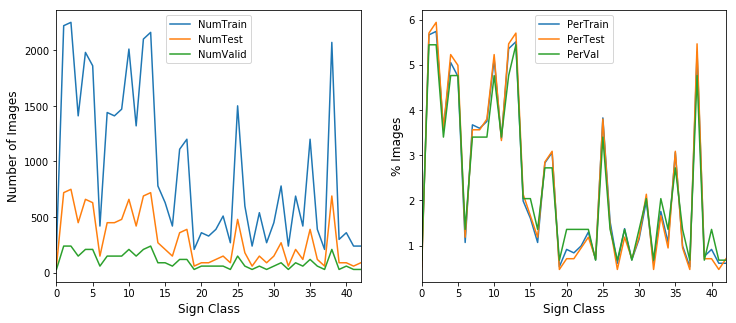

In [25]:



fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)


class_stats.loc[:, 'NumTrain':'NumValid'].plot(ax=ax0)
class_stats.loc[:, 'PerTrain':'PerVal'].plot(ax=ax1)

ax0.set_xlabel('Sign Class', fontsize=12)
ax0.set_ylabel('Number of Images', fontsize=12)

ax1.set_xlabel('Sign Class', fontsize=12)
ax1.set_ylabel('% Images', fontsize=12)



#print(class_stats)


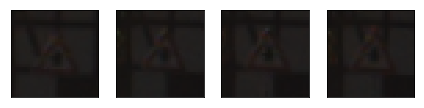

In [31]:

class_11_images = class_helper.get_images_for_class(11,X_train, y_train)
for i in range(4):
    plotter.plot_image(class_11_images[i], 1, 4, i+1)

In [32]:
mean = np.mean(X_train)
std = np.std(X_train)
dark, bright, dark_mean, bright_mean = plotter.get_dark_bright_imgs(class_11_images[:100],mean,std)
print('Number of dark images: '+str(len(dark)))
print('Number of bright images: '+str(len(bright)))


Number of dark images: 52
Number of bright images: 48


There are 52 images in the  dataset


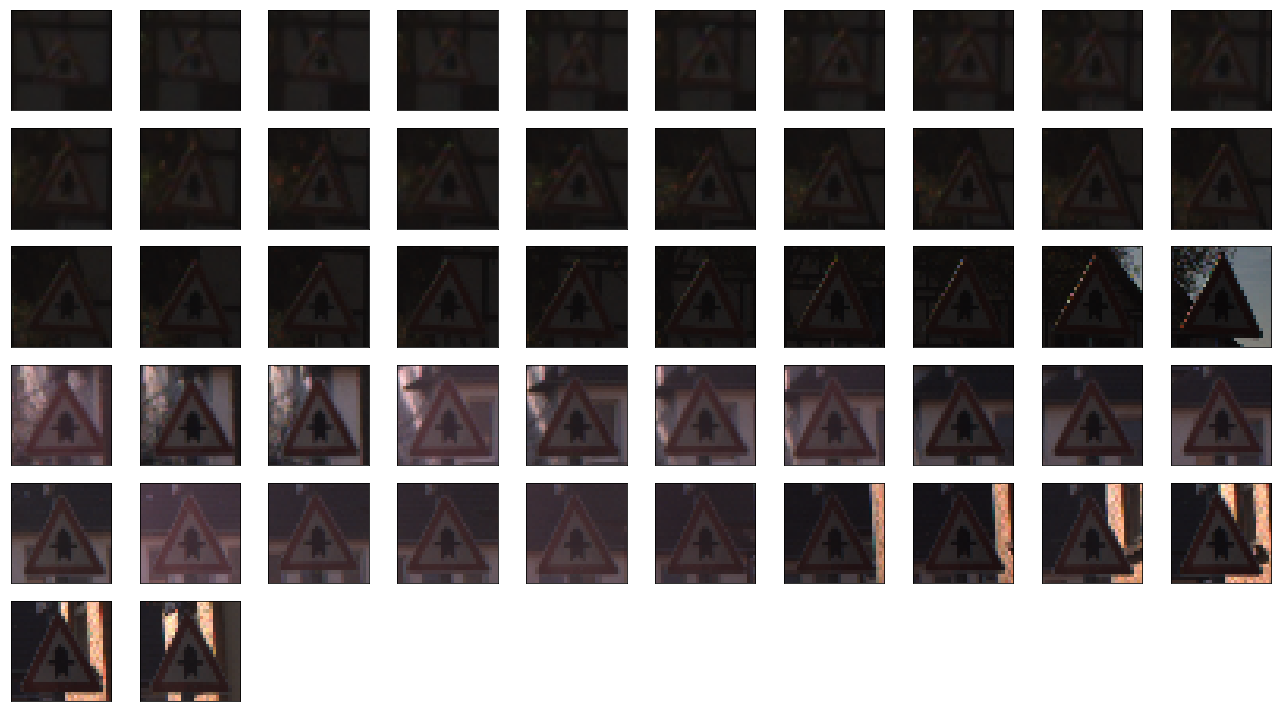

In [33]:

plotter.plot_images(-1,dark,10,"")

There are 48 images in the  dataset


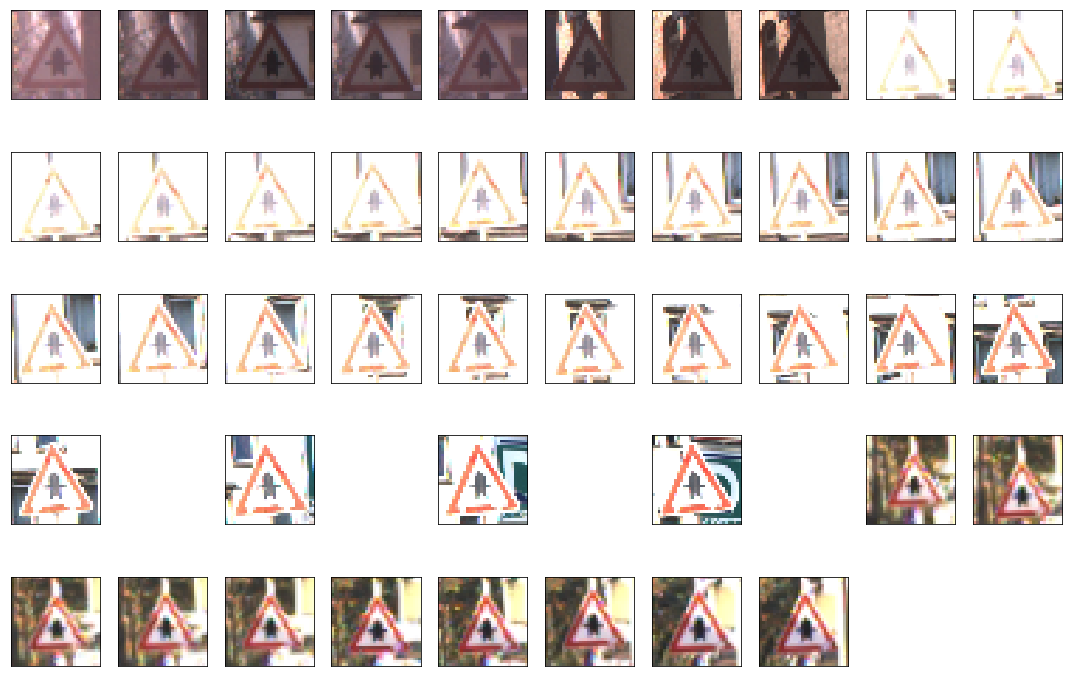

In [34]:
plotter.plot_images(-1,bright,10,"")

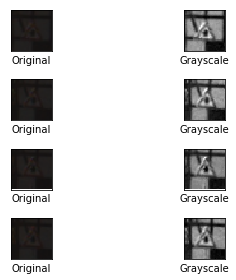

In [35]:
plotter.plot_2_datasets(np.asarray(dark[0:4]), preprocess.conv_to_grayscale_data(np.asarray(dark[0:4])),'Original', 'Grayscale')

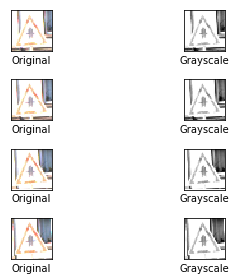

In [36]:
plotter.plot_2_datasets(np.asarray(bright[16:20]), preprocess.conv_to_grayscale_data(np.asarray(bright[16:20])),'Original','Grayscale')


In [37]:
img_dark = dark[0]
img_bright = bright[8]
img_dark_gry = preprocess.conv_to_grayscale_img(img_dark)
img_bright_gry = preprocess.conv_to_grayscale_img(img_bright)

In [42]:
#utility function to help  visualize
def plot_equalize_color_gray(img_dark_equal, img_dark_equal_gry, img_bright_equal, img_bright_equal_gry,op):
    plotter.plot_image(img_dark, 2,4,1, "Original Dark")
    plotter.plot_image(img_dark_equal, 2,4,2,op+" Dark")
    plotter.plot_image(img_dark_gry, 2,4,3, "Original Dark Grey")

    plotter.plot_image(img_dark_equal_gry,2,4,4, op+" Dark Grey")
    plotter.plot_image(img_bright, 2,4,5, "Original Bright")
    plotter.plot_image(img_bright_equal,2,4,6, op+" Bright")
    plotter.plot_image(img_bright_gry, 2,4,7, "Original Bright Grey")

    plotter.plot_image(img_bright_equal_gry,2,4,8, op+" Bright Grey")




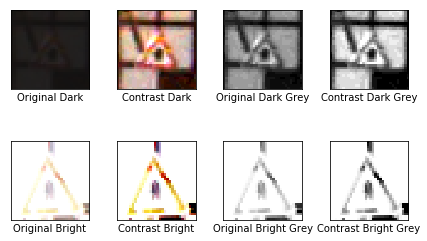

In [44]:
img_dark_contrast = preprocess.contrast_stretch_img(img_dark)
img_bright_contrast = preprocess.contrast_stretch_img(img_bright)
img_dark_contrast_gry = preprocess.contrast_stretch_img(img_dark_gry)
img_bright_contrast_gry = preprocess.contrast_stretch_img(img_bright_gry)


plot_equalize_color_gray(img_dark_contrast,img_dark_contrast_gry,img_bright_contrast,img_bright_contrast_gry,"Contrast")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


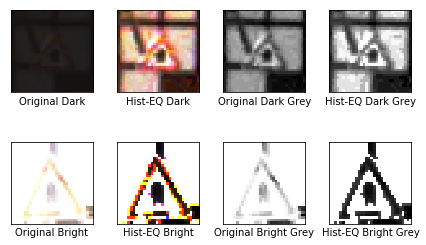

In [45]:
img_dark_hist = preprocess.hist_equalize_img(img_dark)
img_bright_hist = preprocess.hist_equalize_img(img_bright)
img_dark_hist_gry = preprocess.hist_equalize_img(img_dark_gry)
img_bright_hist_gry = preprocess.hist_equalize_img(img_bright_gry)
plot_equalize_color_gray(img_dark_hist,img_dark_hist_gry,img_bright_hist,img_bright_hist_gry,"Hist-EQ")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


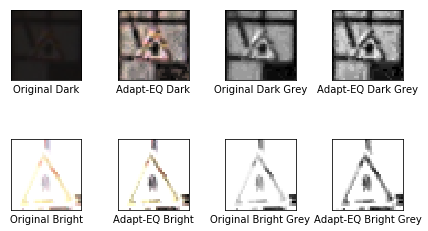

In [46]:
img_dark_adapteq = preprocess.adaptive_equalize_img(img_dark)
img_bright_adapteq = preprocess.adaptive_equalize_img(img_bright)
img_dark_adapteq_gry = preprocess.adaptive_equalize_img(img_dark_gry)
img_bright_adapteq_gry = preprocess.adaptive_equalize_img(img_bright_gry)
plot_equalize_color_gray(img_dark_adapteq,img_dark_adapteq_gry,img_bright_adapteq,img_bright_adapteq_gry,"Adapt-EQ")

In [47]:


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [48]:
#### Everything below here is just to create the plot/graphs ####
# Display results
def hist_compare(img, img_contrast, img_hist, img_adapteq):
    fig = plt.figure(figsize=(10, 7)) 
    axes = np.zeros((2, 4), dtype=np.object)
    axes[0, 0] = fig.add_subplot(2, 4, 1)

    for i in range(1, 4):
        axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])

    for i in range(0, 4):
        axes[1, i] = fig.add_subplot(2, 4, 5+i)

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
    ax_img.set_title('Low contrast image')

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_ylabel('Number of pixels')

    ax_hist.set_yticks(np.linspace(0, y_max, 5))
    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_contrast, axes[:, 1])
    ax_img.set_title('Contrast stretching')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_hist, axes[:, 2])
    ax_img.set_title('Histogram equalization')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
    ax_img.set_title('Adaptive equalization')
    ax_cdf.set_ylabel('Fraction of total intensity')
    ax_cdf.set_yticks(np.linspace(0, 1, 5))

    # prevent overlap of y-axis labels
    fig.tight_layout()
    plt.show()

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


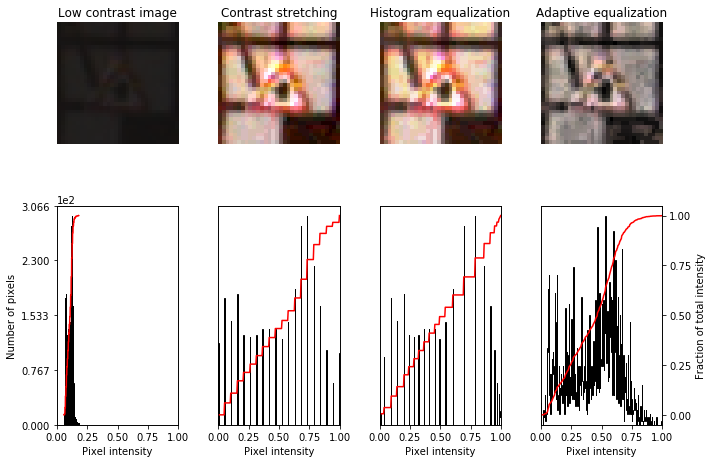

In [49]:
hist_compare(img_dark, img_dark_contrast, img_dark_hist, img_dark_adapteq)


C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


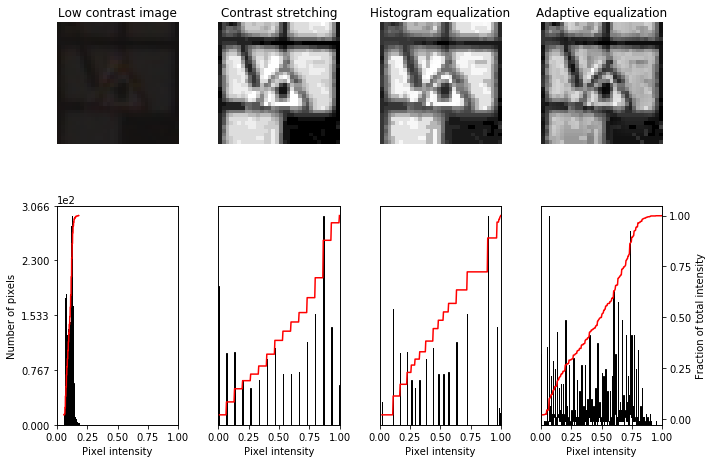

In [50]:
hist_compare(img_dark, img_dark_contrast_gry, img_dark_hist_gry, img_dark_adapteq_gry)


C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


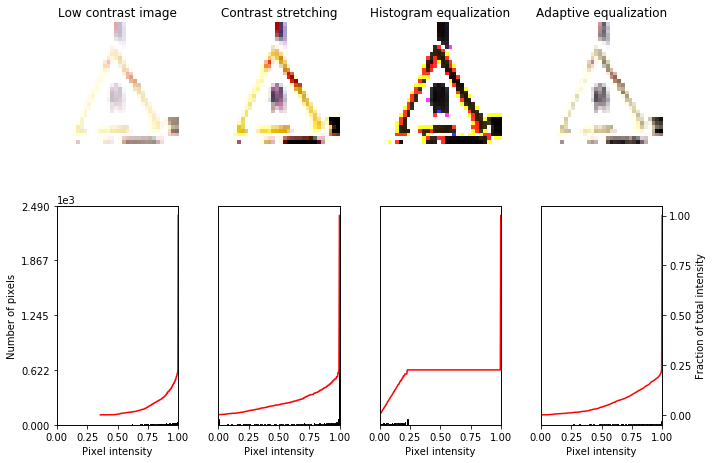

In [51]:
hist_compare(img_bright, img_bright_contrast, img_bright_hist, img_bright_adapteq)


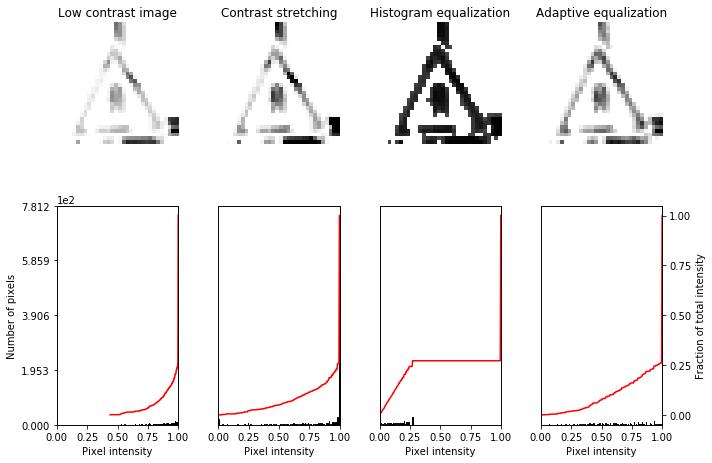

In [52]:
hist_compare(img_bright_gry, img_bright_contrast_gry, img_bright_hist_gry, img_bright_adapteq_gry)
